In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"car_data.csv") 
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
2042,Hyundai Grand i10 1.2 Kappa Sportz Dual Tone,2019,585000,8000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
1837,Tata Manza ELAN Quadrajet BS III,2011,250000,70000,Diesel,Individual,Manual,First Owner,19.0 kmpl,1248 CC,90 bhp,200Nm@ 1750-3000rpm,5.0
5434,Volkswagen Polo 1.5 TDI Comfortline,2014,575000,40000,Diesel,Individual,Manual,Third Owner,20.14 kmpl,1498 CC,88.8 bhp,230Nm@ 1500-2500rpm,5.0
7786,Renault KWID RXT,2017,350000,35000,Petrol,Individual,Manual,Second Owner,25.17 kmpl,799 CC,53.3 bhp,72Nm@ 4386rpm,5.0
3734,Hyundai Grand i10 1.2 Kappa Magna AT,2019,550000,15000,Petrol,Individual,Automatic,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


<p>More torque tends to mean a faster time: It allows the vehicle to accelerate faster, in the initial stages of movement when the car is beginning to start or pick up speed</p>
More Torque helps in generating more BHP at lower RPMs.Hence a high torque Low RPM engine can generate same BHP as a High RPM low torque engine
<p>The size of an engine refers to the total volume of air and fuel being pushed through the engine by the cylinders. It's measured in cubic centimetres (cc). For example, a 1,000cc engine can displace one litre (1,000 cubic centimetres) of this air-fuel mixture</p>

In [3]:
df.year.min()

1983

In [4]:
df.shape

(8128, 13)

In [5]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


<h3>Handling duplicates and missing values

In [6]:
print(df.duplicated().sum())
print(df.duplicated().sum()/df.shape[0])

1202
0.14788385826771652


In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
df.isna().sum()/df.shape[0]

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          0.030032
engine           0.030032
max_power        0.029599
torque           0.030176
seats            0.030032
dtype: float64

In [9]:
df.dropna(inplace=True)
print(df.isna().sum())
print('***********************')
print(df.shape)

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64
***********************
(6717, 13)


In [10]:
df[['selling_price','km_driven','seats']].describe()

,selling_price,km_driven,seats
count,6.717000e+03,6.717000e+03,6717.000000
mean,5.263860e+05,7.339834e+04,5.434271
std,5.235504e+05,5.870328e+04,0.983805
min,2.999900e+04,1.000000e+00,2.000000
25%,2.500000e+05,3.800000e+04,5.000000
50%,4.200000e+05,6.820300e+04,5.000000
75%,6.500000e+05,1.000000e+05,5.000000
max,1.000000e+07,2.360457e+06,14.000000


<AxesSubplot:xlabel='selling_price', ylabel='Count'>

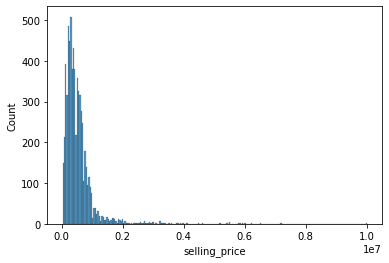

In [11]:
sns.histplot(x='selling_price',data=df)

<h3>Analyzing categorical columns

In [12]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

<h5>Analyzing name column</h5>

In [13]:
unique_name = df['name'].value_counts()
print('Number of Unique name :', unique_name.shape[0])
print('% of data having unique name :',unique_name.shape[0]/df.shape[0]*100)
print('***************************************************')
print('Top 10 rest_type that occured most')
print(unique_name.head(10))

Number of Unique name : 1982
% of data having unique name : 29.507220485335715
***************************************************
Top 10 rest_type that occured most
Maruti Swift Dzire VDI      118
Maruti Alto 800 LXI          76
Maruti Alto LXi              69
Maruti Swift VDI             60
Maruti Alto K10 VXI          47
Hyundai EON Era Plus         44
Maruti Wagon R VXI BS IV     43
Maruti Alto LX               43
Maruti Ertiga VDI            42
Maruti Ritz VDi              40
Name: name, dtype: int64


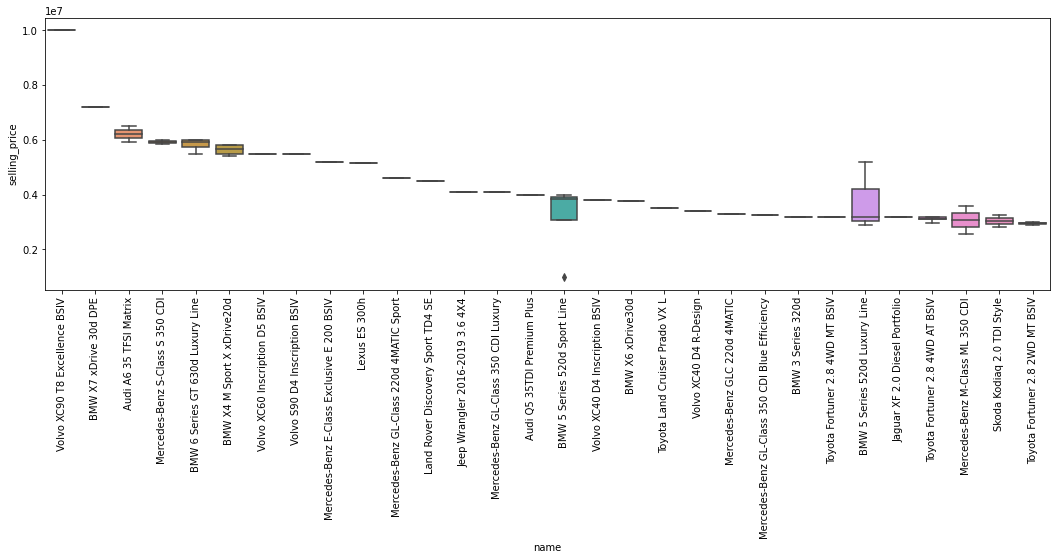

In [14]:
temp = df.groupby(['name'])['selling_price'].median().reset_index().sort_values(by='selling_price',ascending=False)
temp.rename(columns={'selling_price':'selling_price_median'},inplace=True)

plt.figure(figsize=(18,5))
sns.boxplot(y='selling_price',x='name',data=pd.merge(temp,df,on='name'),order=temp['name'].unique().tolist()[:30])
plt.xticks(rotation=90)
plt.show()

In [15]:
temp2 = df.groupby(['name'])['selling_price'].mean().reset_index().sort_values(by='selling_price',ascending=False)
temp2.rename(columns={'selling_price':'selling_price_mean'},inplace=True)

temp3 = df.groupby(['name'])['selling_price'].count().reset_index().sort_values(by='selling_price',ascending=False)
temp3.rename(columns={'selling_price':'no_of_cars'},inplace=True)

temp2 = pd.merge(temp2,temp3,on='name')
temp = pd.merge(temp,temp2,on='name')

temp3 = df.groupby(['name'])['selling_price'].max().reset_index().sort_values(by='selling_price',ascending=False)
temp3.rename(columns={'selling_price':'max_selling_price'},inplace=True)

temp2 = df.groupby(['name'])['selling_price'].min().reset_index().sort_values(by='selling_price',ascending=False)
temp2.rename(columns={'selling_price':'min_selling_price'},inplace=True)

temp2 = pd.merge(temp2,temp3,on='name')
temp = pd.merge(temp,temp2,on='name')

temp['Selling_price_per_car'] = temp['selling_price_mean'] // temp['no_of_cars']

del temp2
del temp3

In [16]:
temp.head()

,name,selling_price_median,selling_price_mean,no_of_cars,min_selling_price,max_selling_price,Selling_price_per_car
0,Volvo XC90 T8 Excellence BSIV,10000000.0,10000000.0,1,10000000,10000000,10000000.0
1,BMW X7 xDrive 30d DPE,7200000.0,7200000.0,1,7200000,7200000,7200000.0
2,Audi A6 35 TFSI Matrix,6223000.0,6223000.0,3,5923000,6523000,2074333.0
3,Mercedes-Benz S-Class S 350 CDI,5925000.0,5925000.0,2,5850000,6000000,2962500.0
4,BMW 6 Series GT 630d Luxury Line,5915000.0,5832500.0,4,5500000,6000000,1458125.0


In [17]:
temp.sort_values(by='no_of_cars',ascending=False).head()

,name,selling_price_median,selling_price_mean,no_of_cars,min_selling_price,max_selling_price,Selling_price_per_car
731,Maruti Swift Dzire VDI,590000.0,578915.194915,118,360000,811000,4906.0
1533,Maruti Alto 800 LXI,257499.5,258473.657895,76,170000,350000,3400.0
1795,Maruti Alto LXi,150000.0,149789.840580,69,85000,225000,2170.0
1149,Maruti Swift VDI,400000.0,424299.966667,60,235000,755000,7071.0
1421,Maruti Alto K10 VXI,300000.0,301446.787234,47,175000,390000,6413.0


In [18]:
temp.sort_values(by='Selling_price_per_car',ascending=False).head()

,name,selling_price_median,selling_price_mean,no_of_cars,min_selling_price,max_selling_price,Selling_price_per_car
0,Volvo XC90 T8 Excellence BSIV,10000000.0,10000000.0,1,10000000,10000000,10000000.0
1,BMW X7 xDrive 30d DPE,7200000.0,7200000.0,1,7200000,7200000,7200000.0
6,Volvo XC60 Inscription D5 BSIV,5500000.0,5500000.0,1,5500000,5500000,5500000.0
7,Volvo S90 D4 Inscription BSIV,5500000.0,5500000.0,1,5500000,5500000,5500000.0
8,Mercedes-Benz E-Class Exclusive E 200 BSIV,5200000.0,5200000.0,1,5200000,5200000,5200000.0


<h5>Which car model has highest selling price</h5>

In [19]:
unique_name = df['name'].value_counts()
print('Number of Unique name :', unique_name.shape[0])
print('% of data having unique name :',unique_name.shape[0]/df.shape[0]*100)
print('***************************************************')
print('Top 10 rest_type that occured most')
print(unique_name.head(10))

Number of Unique name : 1982
% of data having unique name : 29.507220485335715
***************************************************
Top 10 rest_type that occured most
Maruti Swift Dzire VDI      118
Maruti Alto 800 LXI          76
Maruti Alto LXi              69
Maruti Swift VDI             60
Maruti Alto K10 VXI          47
Hyundai EON Era Plus         44
Maruti Wagon R VXI BS IV     43
Maruti Alto LX               43
Maruti Ertiga VDI            42
Maruti Ritz VDi              40
Name: name, dtype: int64


In [20]:
df['name'] = df['name'].str.split(' ').str[0]

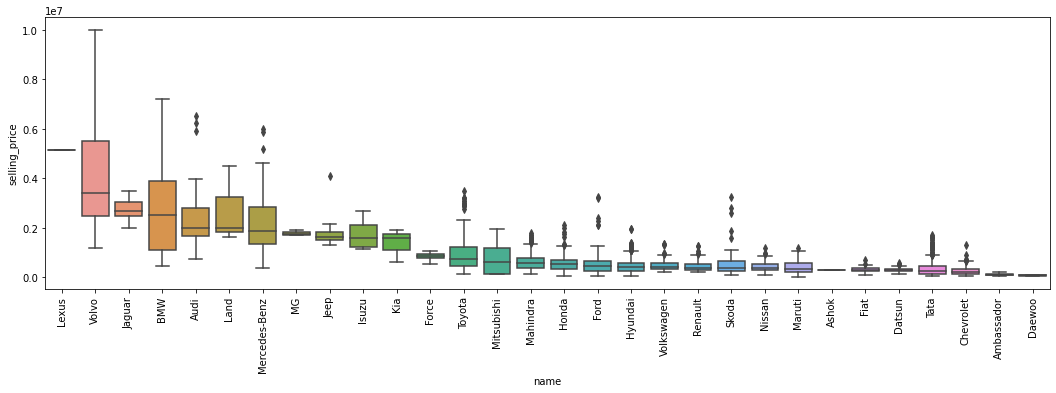

In [21]:
temp = df.groupby(['name'])['selling_price'].median().reset_index().sort_values(by='selling_price',ascending=False)
temp.rename(columns={'selling_price':'selling_price_median'},inplace=True)

plt.figure(figsize=(18,5))
sns.boxplot(y='selling_price',x='name',data=pd.merge(temp,df,on='name'),order=temp['name'].unique().tolist()[:30])
plt.xticks(rotation=90)
plt.show()

In [22]:
temp2 = df.groupby(['name'])['selling_price'].mean().reset_index().sort_values(by='selling_price',ascending=False)
temp2.rename(columns={'selling_price':'selling_price_mean'},inplace=True)

temp3 = df.groupby(['name'])['selling_price'].count().reset_index().sort_values(by='selling_price',ascending=False)
temp3.rename(columns={'selling_price':'no_of_cars'},inplace=True)

temp2 = pd.merge(temp2,temp3,on='name')
temp = pd.merge(temp,temp2,on='name')

temp3 = df.groupby(['name'])['selling_price'].max().reset_index().sort_values(by='selling_price',ascending=False)
temp3.rename(columns={'selling_price':'max_selling_price'},inplace=True)

temp2 = df.groupby(['name'])['selling_price'].min().reset_index().sort_values(by='selling_price',ascending=False)
temp2.rename(columns={'selling_price':'min_selling_price'},inplace=True)

temp2 = pd.merge(temp2,temp3,on='name')
temp = pd.merge(temp,temp2,on='name')

temp['Selling_price_per_car'] = temp['selling_price_mean'] // temp['no_of_cars']

del temp2
del temp3

In [23]:
temp.head()

,name,selling_price_median,selling_price_mean,no_of_cars,min_selling_price,max_selling_price,Selling_price_per_car
0,Lexus,5150000,5.150000e+06,1,5150000,5150000,5150000.0
1,Volvo,3400000,4.036111e+06,9,1200000,10000000,448456.0
2,Jaguar,2668000,2.748250e+06,8,2000000,3500000,343531.0
3,BMW,2500000,2.826222e+06,45,480000,7200000,62804.0
4,Audi,2000000,2.422364e+06,33,730000,6523000,73404.0


In [24]:
temp.sort_values(by='no_of_cars',ascending=False).head()

,name,selling_price_median,selling_price_mean,no_of_cars,min_selling_price,max_selling_price,Selling_price_per_car
22,Maruti,350000,393974.543801,2089,29999,1200000,188.0
17,Hyundai,425000,466601.687809,1214,55000,1950000,384.0
14,Mahindra,570000,623684.023977,709,120000,1800000,879.0
26,Tata,265000,348941.398104,633,45000,1700000,551.0
15,Honda,560000,574460.207756,361,50000,2125000,1591.0


In [25]:
temp.sort_values(by='Selling_price_per_car',ascending=False).head()

,name,selling_price_median,selling_price_mean,no_of_cars,min_selling_price,max_selling_price,Selling_price_per_car
0,Lexus,5150000,5.150000e+06,1,5150000,5150000,5150000.0
5,Land,2000000,2.716667e+06,3,1650000,4500000,905555.0
7,MG,1750000,1.783333e+06,3,1700000,1900000,594444.0
10,Kia,1575000,1.372667e+06,3,643000,1900000,457555.0
1,Volvo,3400000,4.036111e+06,9,1200000,10000000,448456.0


<h5>Analyzing fuel column</h5>

In [26]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [27]:
unique_fuel = df['fuel'].value_counts()
print('Number of Unique fuel :', unique_fuel.shape[0])
print('% of data having unique fuel :',unique_fuel.shape[0]/df.shape[0]*100)
print('***************************************************')
print(unique_fuel.head(10))

Number of Unique fuel : 4
% of data having unique fuel : 0.0595503945213637
***************************************************
Diesel    3658
Petrol    2973
CNG         51
LPG         35
Name: fuel, dtype: int64


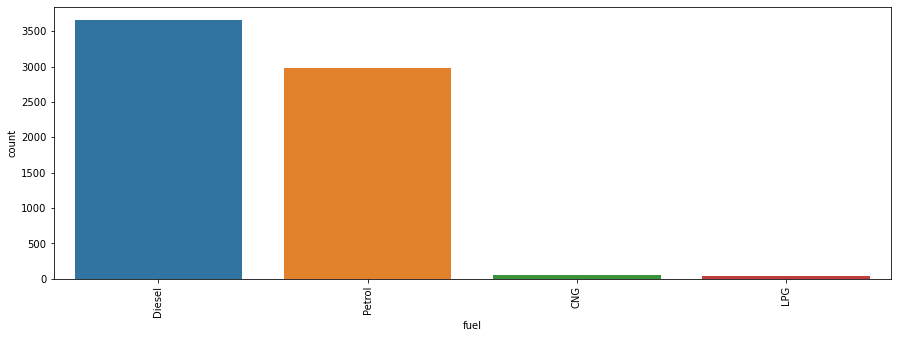

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(x='fuel', order=unique_fuel.index.tolist(),data=df)
plt.xticks(rotation=90)
plt.show()

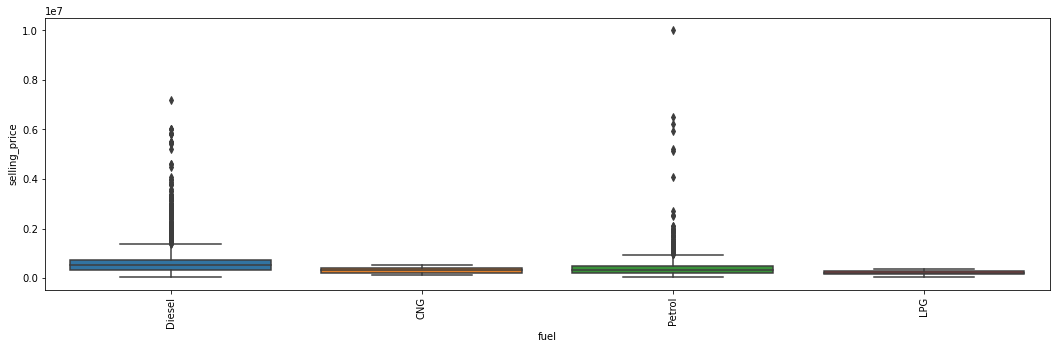

In [29]:
temp = df.groupby(['fuel'])['selling_price'].median().reset_index().sort_values(by='selling_price',ascending=False)
temp.rename(columns={'selling_price':'selling_price_median'},inplace=True)

plt.figure(figsize=(18,5))
sns.boxplot(y='selling_price',x='fuel',data=pd.merge(temp,df,on='fuel'),order=temp['fuel'].unique().tolist()[:30])
plt.xticks(rotation=90)
plt.show()

In [30]:
temp2 = df.groupby(['fuel'])['selling_price'].mean().reset_index().sort_values(by='selling_price',ascending=False)
temp2.rename(columns={'selling_price':'selling_price_mean'},inplace=True)

temp3 = df.groupby(['fuel'])['selling_price'].count().reset_index().sort_values(by='selling_price',ascending=False)
temp3.rename(columns={'selling_price':'no_of_cars'},inplace=True)

temp2 = pd.merge(temp2,temp3,on='fuel')
temp = pd.merge(temp,temp2,on='fuel')

temp3 = df.groupby(['fuel'])['selling_price'].max().reset_index().sort_values(by='selling_price',ascending=False)
temp3.rename(columns={'selling_price':'max_selling_price'},inplace=True)

temp2 = df.groupby(['fuel'])['selling_price'].min().reset_index().sort_values(by='selling_price',ascending=False)
temp2.rename(columns={'selling_price':'min_selling_price'},inplace=True)

temp2 = pd.merge(temp2,temp3,on='fuel')
temp = pd.merge(temp,temp2,on='fuel')

temp['Selling_price_per_car'] = temp['selling_price_mean'] // temp['no_of_cars']

del temp2
del temp3

In [31]:
temp.head()

,fuel,selling_price_median,selling_price_mean,no_of_cars,min_selling_price,max_selling_price,Selling_price_per_car
0,Diesel,525000,647996.111536,3658,45000,7200000,177.0
1,CNG,330000,317666.607843,51,120000,545000,6228.0
2,Petrol,320000,384050.780020,2973,29999,10000000,129.0
3,LPG,200000,210885.714286,35,54000,375000,6025.0


<h5>Analyzing seller_type column</h5>

In [32]:
unique_seller_type = df['seller_type'].value_counts()
print('Number of seller_type :', unique_seller_type.shape[0])
print('% of data having unique seller_type :',unique_seller_type.shape[0]/df.shape[0]*100)
print('***************************************************')
print(unique_seller_type.head(10))

Number of seller_type : 3
% of data having unique seller_type : 0.044662795891022775
***************************************************
Individual          6024
Dealer               666
Trustmark Dealer      27
Name: seller_type, dtype: int64


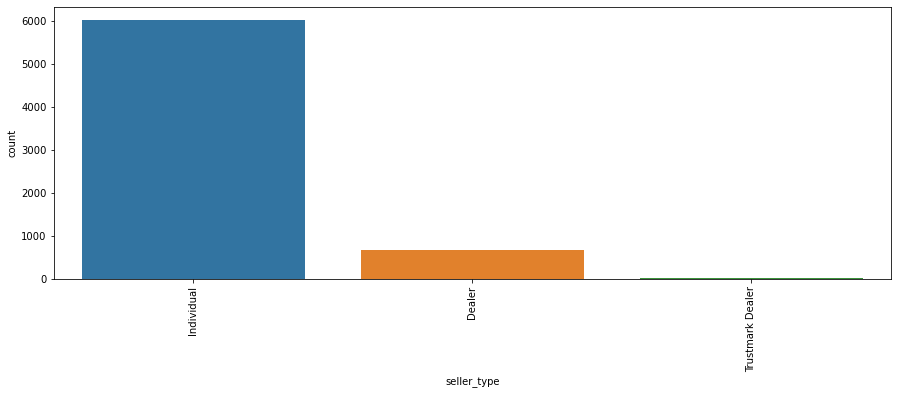

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(x='seller_type', order=unique_seller_type.index.tolist(),data=df)
plt.xticks(rotation=90)
plt.show()

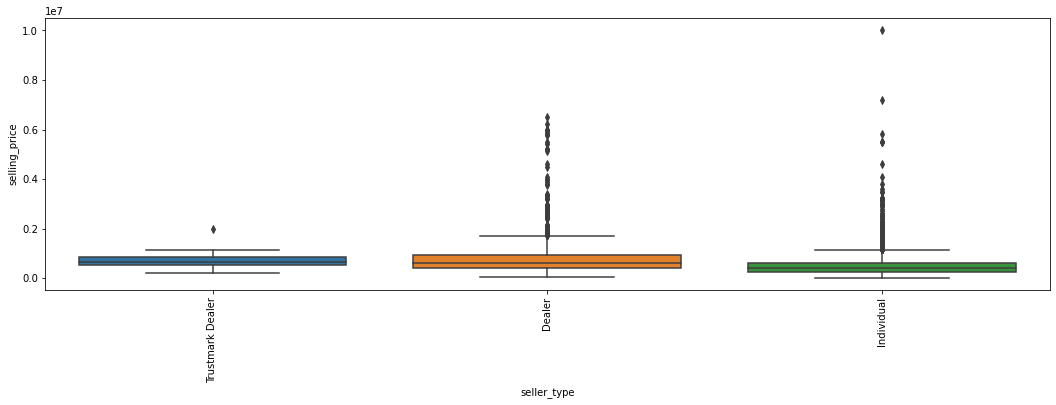

In [34]:
temp = df.groupby(['seller_type'])['selling_price'].median().reset_index().sort_values(by='selling_price',ascending=False)
temp.rename(columns={'selling_price':'selling_price_median'},inplace=True)

plt.figure(figsize=(18,5))
sns.boxplot(y='selling_price',x='seller_type',data=pd.merge(temp,df,on='seller_type'),order=temp['seller_type'].unique().tolist()[:30])
plt.xticks(rotation=90)
plt.show()

In [35]:
temp2 = df.groupby(['seller_type'])['selling_price'].mean().reset_index().sort_values(by='selling_price',ascending=False)
temp2.rename(columns={'selling_price':'selling_price_mean'},inplace=True)

temp3 = df.groupby(['seller_type'])['selling_price'].count().reset_index().sort_values(by='selling_price',ascending=False)
temp3.rename(columns={'selling_price':'no_of_cars'},inplace=True)

temp2 = pd.merge(temp2,temp3,on='seller_type')
temp = pd.merge(temp,temp2,on='seller_type')

temp3 = df.groupby(['seller_type'])['selling_price'].max().reset_index().sort_values(by='selling_price',ascending=False)
temp3.rename(columns={'selling_price':'max_selling_price'},inplace=True)

temp2 = df.groupby(['seller_type'])['selling_price'].min().reset_index().sort_values(by='selling_price',ascending=False)
temp2.rename(columns={'selling_price':'min_selling_price'},inplace=True)

temp2 = pd.merge(temp2,temp3,on='seller_type')
temp = pd.merge(temp,temp2,on='seller_type')

temp['Selling_price_per_car'] = temp['selling_price_mean'] // temp['no_of_cars']

del temp2
del temp3

In [36]:
temp.head()

,seller_type,selling_price_median,selling_price_mean,no_of_cars,min_selling_price,max_selling_price,Selling_price_per_car
0,Trustmark Dealer,650000,718111.111111,27,225000,2000000,26596.0
1,Dealer,625000,936708.656156,666,60000,6523000,1406.0
2,Individual,400000,480162.313579,6024,29999,10000000,79.0


In [37]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


<h5>Analyzing transmission column</h5>

In [38]:
unique_transmission = df['transmission'].value_counts()
print('Number of Unique transmission :', unique_transmission.shape[0])
print('% of data having unique transmission :',unique_transmission.shape[0]/df.shape[0]*100)
print('***************************************************')
print(unique_transmission.head(10))

Number of Unique transmission : 2
% of data having unique transmission : 0.02977519726068185
***************************************************
Manual       6142
Automatic     575
Name: transmission, dtype: int64


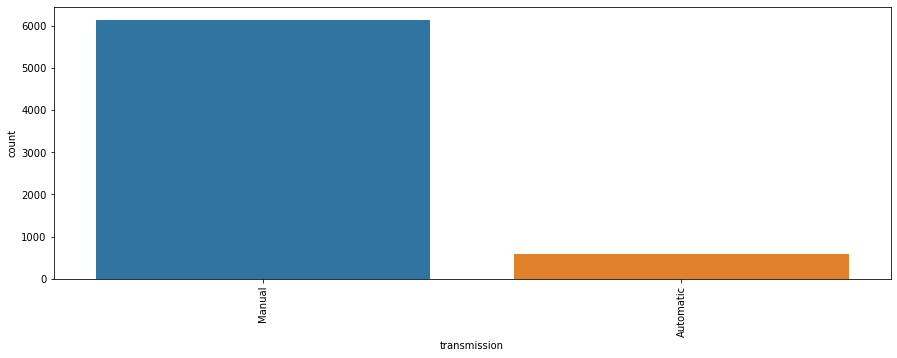

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(x='transmission', order=unique_transmission.index.tolist(),data=df)
plt.xticks(rotation=90)
plt.show()

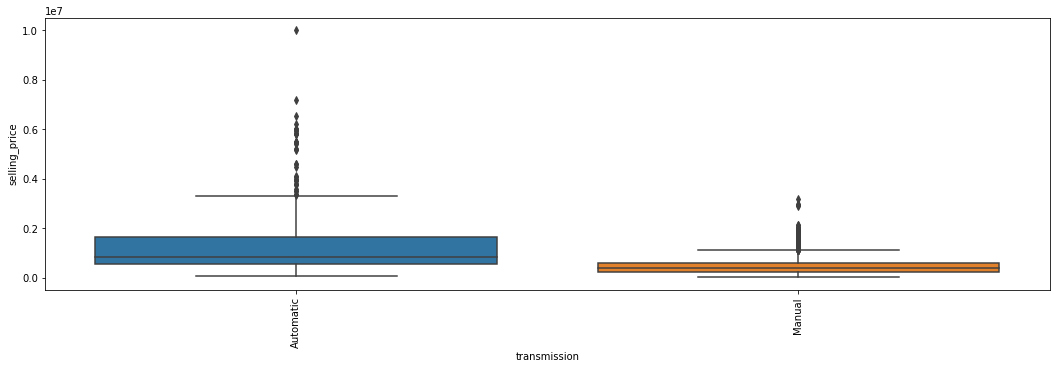

In [40]:
temp = df.groupby(['transmission'])['selling_price'].median().reset_index().sort_values(by='selling_price',ascending=False)
temp.rename(columns={'selling_price':'selling_price_median'},inplace=True)

plt.figure(figsize=(18,5))
sns.boxplot(y='selling_price',x='transmission',data=pd.merge(temp,df,on='transmission'),order=temp['transmission'].unique().tolist()[:30])
plt.xticks(rotation=90)
plt.show()

In [41]:
temp2 = df.groupby(['transmission'])['selling_price'].mean().reset_index().sort_values(by='selling_price',ascending=False)
temp2.rename(columns={'selling_price':'selling_price_mean'},inplace=True)

temp3 = df.groupby(['transmission'])['selling_price'].count().reset_index().sort_values(by='selling_price',ascending=False)
temp3.rename(columns={'selling_price':'no_of_cars'},inplace=True)

temp2 = pd.merge(temp2,temp3,on='transmission')
temp = pd.merge(temp,temp2,on='transmission')

temp3 = df.groupby(['transmission'])['selling_price'].max().reset_index().sort_values(by='selling_price',ascending=False)
temp3.rename(columns={'selling_price':'max_selling_price'},inplace=True)

temp2 = df.groupby(['transmission'])['selling_price'].min().reset_index().sort_values(by='selling_price',ascending=False)
temp2.rename(columns={'selling_price':'min_selling_price'},inplace=True)

temp2 = pd.merge(temp2,temp3,on='transmission')
temp = pd.merge(temp,temp2,on='transmission')

temp['Selling_price_per_car'] = temp['selling_price_mean'] // temp['no_of_cars']

del temp2
del temp3

In [42]:
temp.head()

,transmission,selling_price_median,selling_price_mean,no_of_cars,min_selling_price,max_selling_price,Selling_price_per_car
0,Automatic,850000,1.322916e+06,575,75000,10000000,2300.0
1,Manual,400000,4.518166e+05,6142,29999,3200000,73.0


<h5>Analyzing owner column</h5>

In [43]:
unique_owner = df['owner'].value_counts()
print('Number of Unique owner :', unique_owner.shape[0])
print('% of data having unique owner :',unique_owner.shape[0]/df.shape[0]*100)
print('***************************************************')
print(unique_owner.head(10))

Number of Unique owner : 5
% of data having unique owner : 0.07443799315170463
***************************************************
First Owner             4176
Second Owner            1888
Third Owner              493
Fourth & Above Owner     155
Test Drive Car             5
Name: owner, dtype: int64


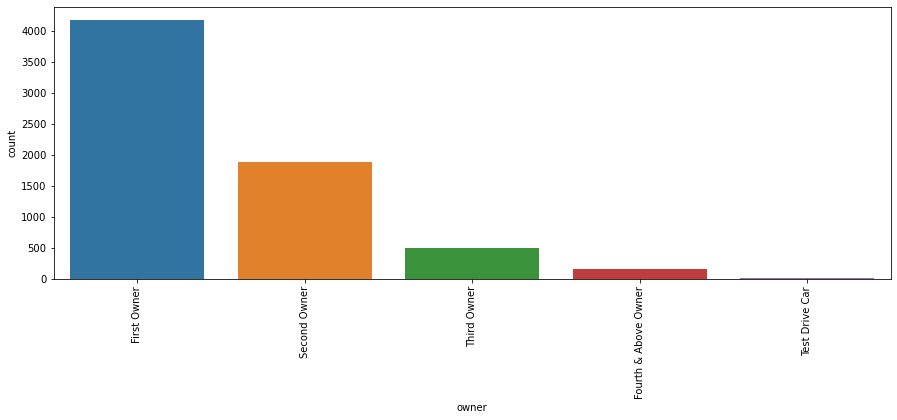

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(x='owner', order=unique_owner.index.tolist(),data=df)
plt.xticks(rotation=90)
plt.show()

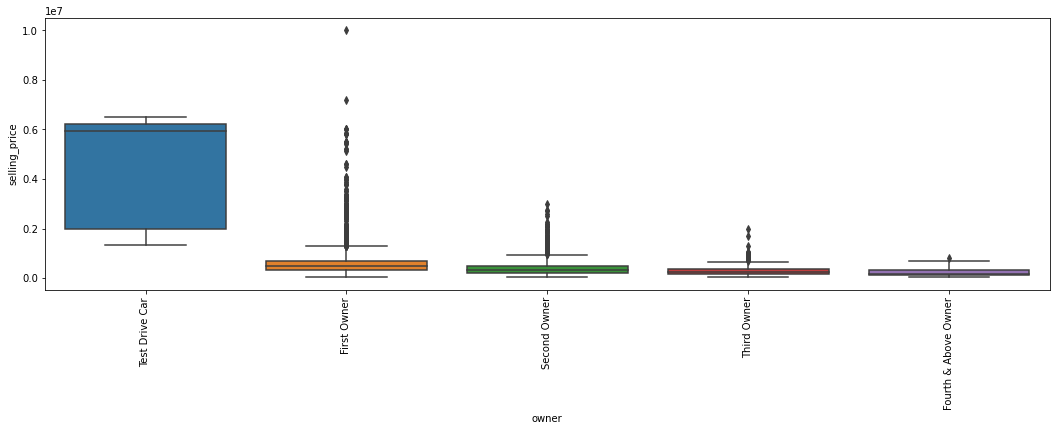

In [45]:
temp = df.groupby(['owner'])['selling_price'].median().reset_index().sort_values(by='selling_price',ascending=False)
temp.rename(columns={'selling_price':'selling_price_median'},inplace=True)

plt.figure(figsize=(18,5))
sns.boxplot(y='selling_price',x='owner',data=pd.merge(temp,df,on='owner'),order=temp['owner'].unique().tolist()[:30])
plt.xticks(rotation=90)
plt.show()

In [46]:
temp2 = df.groupby(['owner'])['selling_price'].mean().reset_index().sort_values(by='selling_price',ascending=False)
temp2.rename(columns={'selling_price':'selling_price_mean'},inplace=True)

temp3 = df.groupby(['owner'])['selling_price'].count().reset_index().sort_values(by='selling_price',ascending=False)
temp3.rename(columns={'selling_price':'no_of_cars'},inplace=True)

temp2 = pd.merge(temp2,temp3,on='owner')
temp = pd.merge(temp,temp2,on='owner')

temp3 = df.groupby(['owner'])['selling_price'].max().reset_index().sort_values(by='selling_price',ascending=False)
temp3.rename(columns={'selling_price':'max_selling_price'},inplace=True)

temp2 = df.groupby(['owner'])['selling_price'].min().reset_index().sort_values(by='selling_price',ascending=False)
temp2.rename(columns={'selling_price':'min_selling_price'},inplace=True)

temp2 = pd.merge(temp2,temp3,on='owner')
temp = pd.merge(temp,temp2,on='owner')

temp['Selling_price_per_car'] = temp['selling_price_mean'] // temp['no_of_cars']

del temp2
del temp3

In [47]:
temp.head()

,owner,selling_price_median,selling_price_mean,no_of_cars,min_selling_price,max_selling_price,Selling_price_per_car
0,Test Drive Car,5923000,4.403800e+06,5,1350000,6523000,880760.0
1,First Owner,500000,6.205114e+05,4176,30000,10000000,148.0
2,Second Owner,320000,3.938863e+05,1888,35000,3000000,208.0
3,Third Owner,229999,2.897515e+05,493,29999,2000000,587.0
4,Fourth & Above Owner,185000,2.319709e+05,155,31000,810000,1496.0


<h5>Analyzing number of seats column</h5>

In [48]:
unique_seats = df['seats'].value_counts()
print('Number of Unique seats :', unique_seats.shape[0])
print('% of data having unique seats :',unique_seats.shape[0]/df.shape[0]*100)
print('***************************************************')
print(unique_seats.head(10))

Number of Unique seats : 9
% of data having unique seats : 0.13398838767306834
***************************************************
5.0     5254
7.0      966
8.0      221
4.0      124
9.0       74
6.0       57
10.0      18
2.0        2
14.0       1
Name: seats, dtype: int64


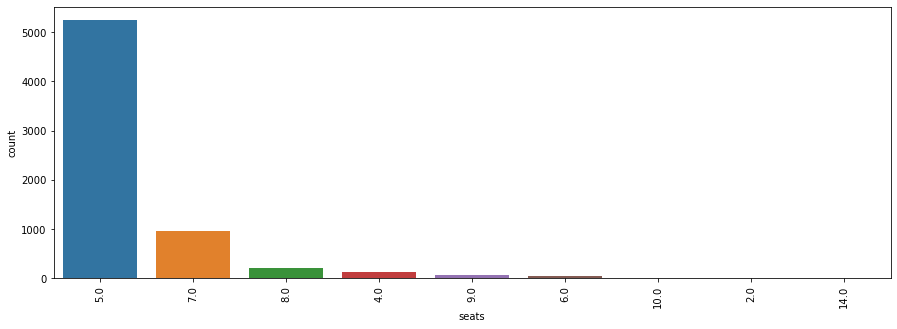

In [49]:
plt.figure(figsize=(15,5))
sns.countplot(x='seats', order=unique_seats.index.tolist(),data=df)
plt.xticks(rotation=90)
plt.show()

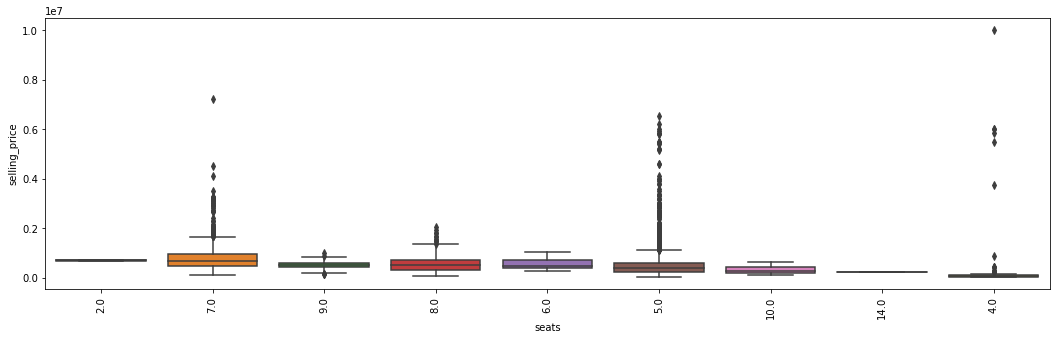

In [50]:
temp = df.groupby(['seats'])['selling_price'].median().reset_index().sort_values(by='selling_price',ascending=False)
temp.rename(columns={'selling_price':'selling_price_median'},inplace=True)

plt.figure(figsize=(18,5))
sns.boxplot(y='selling_price',x='seats',data=pd.merge(temp,df,on='seats'),order=temp['seats'].unique().tolist()[:30])
plt.xticks(rotation=90)
plt.show()

In [51]:
temp2 = df.groupby(['seats'])['selling_price'].mean().reset_index().sort_values(by='selling_price',ascending=False)
temp2.rename(columns={'selling_price':'selling_price_mean'},inplace=True)

temp3 = df.groupby(['seats'])['selling_price'].count().reset_index().sort_values(by='selling_price',ascending=False)
temp3.rename(columns={'selling_price':'no_of_cars'},inplace=True)

temp2 = pd.merge(temp2,temp3,on='seats')
temp = pd.merge(temp,temp2,on='seats')

temp3 = df.groupby(['seats'])['selling_price'].max().reset_index().sort_values(by='selling_price',ascending=False)
temp3.rename(columns={'selling_price':'max_selling_price'},inplace=True)

temp2 = df.groupby(['seats'])['selling_price'].min().reset_index().sort_values(by='selling_price',ascending=False)
temp2.rename(columns={'selling_price':'min_selling_price'},inplace=True)

temp2 = pd.merge(temp2,temp3,on='seats')
temp = pd.merge(temp,temp2,on='seats')

temp['Selling_price_per_car'] = temp['selling_price_mean'] // temp['no_of_cars']

del temp2
del temp3

In [52]:
temp.head()

,seats,selling_price_median,selling_price_mean,no_of_cars,min_selling_price,max_selling_price,Selling_price_per_car
0,2.0,700500.0,700500.000000,2,679000,722000,350250.0
1,7.0,675000.0,798927.504141,966,95000,7200000,827.0
2,9.0,504999.5,503540.472973,74,150000,999000,6804.0
3,8.0,500000.0,572832.538462,221,80000,2064000,2592.0
4,6.0,480000.0,560684.210526,57,280000,1040000,9836.0


<h5>Analyzing year column</h5>

In [53]:
unique_year = df['year'].value_counts()
print('Number of Unique year :', unique_year.shape[0])
print('% of data having unique year :',unique_year.shape[0]/df.shape[0]*100)
print('***************************************************')
print(unique_year.head(10))

Number of Unique year : 27
% of data having unique year : 0.40196516301920504
***************************************************
2017    802
2016    691
2015    680
2018    607
2014    580
2012    576
2013    560
2011    535
2010    361
2019    347
Name: year, dtype: int64


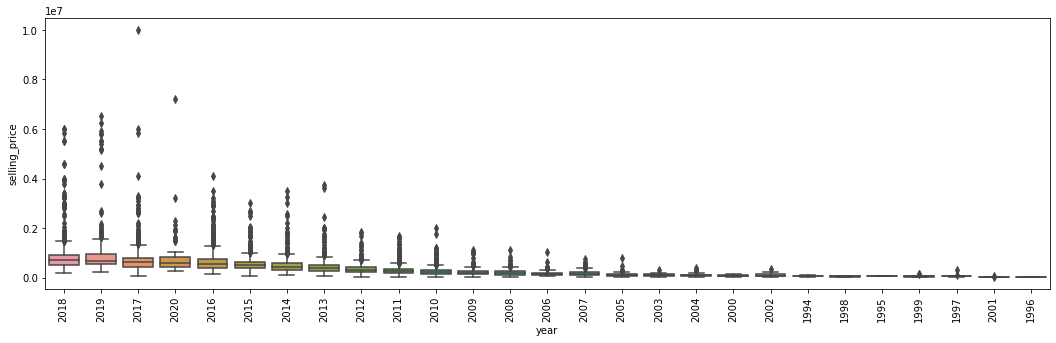

In [54]:
temp = df.groupby(['year'])['selling_price'].median().reset_index().sort_values(by='selling_price',ascending=False)
temp.rename(columns={'selling_price':'selling_price_median'},inplace=True)

plt.figure(figsize=(18,5))
sns.boxplot(y='selling_price',x='year',data=pd.merge(temp,df,on='year'),order=temp['year'].unique().tolist()[:30])
plt.xticks(rotation=90)
plt.show()

In [55]:
temp2 = df.groupby(['year'])['selling_price'].mean().reset_index().sort_values(by='selling_price',ascending=False)
temp2.rename(columns={'selling_price':'selling_price_mean'},inplace=True)

temp3 = df.groupby(['year'])['selling_price'].count().reset_index().sort_values(by='selling_price',ascending=False)
temp3.rename(columns={'selling_price':'no_of_cars'},inplace=True)

temp2 = pd.merge(temp2,temp3,on='year')
temp = pd.merge(temp,temp2,on='year')

temp3 = df.groupby(['year'])['selling_price'].max().reset_index().sort_values(by='selling_price',ascending=False)
temp3.rename(columns={'selling_price':'max_selling_price'},inplace=True)

temp2 = df.groupby(['year'])['selling_price'].min().reset_index().sort_values(by='selling_price',ascending=False)
temp2.rename(columns={'selling_price':'min_selling_price'},inplace=True)

temp2 = pd.merge(temp2,temp3,on='year')
temp = pd.merge(temp,temp2,on='year')

temp['Selling_price_per_car'] = temp['selling_price_mean'] // temp['no_of_cars']

del temp2
del temp3

In [56]:
temp.head()

,year,selling_price_median,selling_price_mean,no_of_cars,min_selling_price,max_selling_price,Selling_price_per_car
0,2018,700000,866775.915980,607,200000,6000000,1427.0
1,2019,693000,949668.547550,347,220000,6523000,2736.0
2,2017,625000,731609.688279,802,66000,10000000,912.0
3,2020,600000,888349.158730,63,250000,7200000,14100.0
4,2016,550000,653392.149059,691,150000,4090000,945.0


In [57]:
temp.sort_values(by='no_of_cars',ascending=False).head()

,year,selling_price_median,selling_price_mean,no_of_cars,min_selling_price,max_selling_price,Selling_price_per_car
2,2017,625000,731609.688279,802,66000,10000000,912.0
4,2016,550000,653392.149059,691,150000,4090000,945.0
5,2015,527500,589345.533824,680,80000,3000000,866.0
0,2018,700000,866775.915980,607,200000,6000000,1427.0
6,2014,450000,512367.175862,580,95000,3500000,883.0


<h3>Preprocessing numericals columns</h3>

In [58]:
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
3688,Maruti,2019,1000000,15000,Petrol,Individual,Manual,First Owner,19.01 kmpl,1462 CC,103.2 bhp,138nm@ 4400rpm,6.0
7904,Maruti,2013,500000,92000,Diesel,Individual,Manual,Third Owner,20.77 kmpl,1248 CC,88.76 bhp,200Nm@ 1750rpm,7.0
790,Ford,2019,720000,10000,Petrol,Individual,Manual,First Owner,19.0 kmpl,1194 CC,94.68 bhp,120Nm@ 4250rpm,5.0
7909,Tata,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2739,Honda,2015,600000,25000,Diesel,Individual,Manual,First Owner,25.8 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


<h5>Preprocessing mileage,engine,max_power and convering them to integers

In [59]:
def process_mileage(x):
    try:
        return x[:-5]
    except TypeError:
        return x

def process_engine(x):
    return x[:-3]

def process_max_power(x):
    return x[:-4]

In [60]:
df['engine'] = df['engine'].apply(lambda x : process_engine(x))
df['mileage'] = df['mileage'].apply(lambda x : process_mileage(x))
df['max_power'] = df['max_power'].apply(lambda x : process_max_power(x))

In [61]:
df['seats']  = df['seats'].astype('int32')
df['engine']  = df['engine'].astype('int32')
df['mileage']  = df['mileage'].astype('float32')
df['max_power']  = df['max_power'].astype('float32')

<h5>Preprocessing torque column and convering them to integers

In [62]:
df.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
3294,Ford,2010,185000,124316,Diesel,Dealer,Manual,Second Owner,20.00,1399,68.000000,160Nm@ 2000rpm,5
7578,Maruti,2018,730000,60000,Diesel,Individual,Automatic,First Owner,28.40,1248,74.019997,190Nm@ 2000rpm,5
3764,Tata,2017,440000,57000,Petrol,Dealer,Manual,First Owner,23.84,1199,84.480003,113Nm@ 3300rpm,5


In [63]:
l = re.findall(r"\d*\.\d+|\d+", "200Nm@ 1750-3000rpm")
' '.join(l)

'200 1750 3000'

In [64]:
def preprocess_torque(s):
    l = re.findall(r"\d*\.\d+|\d+", s)
    return ' '.join(l)

In [65]:
df['torque'] = df['torque'].apply(lambda x : preprocess_torque(x))

In [66]:
df['torque_NM'] = df["torque"].str.split(" ").str[0]
df['torque_rpm'] = df["torque"].str.split(" ").str[1]

df['torque_NM']  = df['torque_NM'].astype('float32')
df['torque_rpm']  = df['torque_rpm'].astype('float32')

df.drop(columns=['torque'],inplace=True)

In [67]:
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_NM,torque_rpm
5105,Fiat,2011,300000,60000,Diesel,Individual,Manual,First Owner,20.299999,1248,75.000000,5,197.0,1750.0
2422,Tata,2015,130000,60000,Petrol,Individual,Manual,First Owner,25.400000,624,37.480000,4,51.0,4000.0
1908,Honda,2009,280000,40000,Petrol,Individual,Automatic,Third Owner,12.900000,1799,130.000000,5,172.0,4300.0
2281,Mahindra,2011,280000,120000,Diesel,Individual,Manual,First Owner,13.600000,2523,63.000000,7,180.0,1440.0
5343,Maruti,2011,225000,30000,Petrol,Individual,Manual,First Owner,20.920000,998,67.099998,5,90.0,3500.0


<h5>preprocessing year column

In [68]:
df['year'] = abs(df.year - df.year.max())+1
df['year'] /= df.year.max()

In [69]:
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_NM,torque_rpm
3453,Nissan,0.333333,290000,112072,Diesel,Individual,Manual,First Owner,21.639999,1461,84.800003,5,200.000000,2000.0
6822,Volkswagen,0.222222,620000,33000,Diesel,Individual,Manual,First Owner,20.139999,1498,88.800003,5,230.000000,1500.0
2754,Hyundai,0.407407,200000,90000,Petrol,Individual,Manual,First Owner,17.920000,1086,62.099998,5,96.099998,3000.0
240,Maruti,0.148148,409999,13500,Petrol,Individual,Manual,First Owner,15.370000,1196,73.000000,5,101.000000,3000.0
7198,Hyundai,0.333333,330000,90000,Diesel,Individual,Manual,First Owner,23.000000,1396,90.000000,5,22.400000,1750.0


<h3>Analyzing numerical variables

In [70]:
df['transmission'] = df['transmission'].map({'Manual':0,'Automatic':1})

<AxesSubplot:>

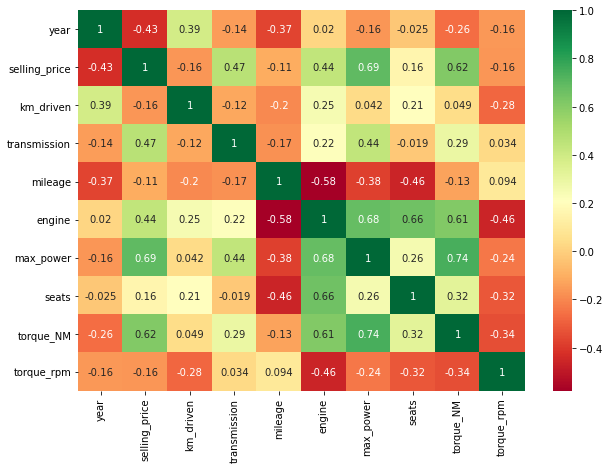

In [71]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [72]:
df.corr()['selling_price'].sort_values(ascending=False)

selling_price    1.000000
max_power        0.692323
torque_NM        0.616919
transmission     0.465538
engine           0.442772
seats            0.158531
mileage         -0.108655
km_driven       -0.161265
torque_rpm      -0.164555
year            -0.427335
Name: selling_price, dtype: float64

In [73]:
num_columns = df.corr()['selling_price'].sort_values(ascending=False).index.tolist()

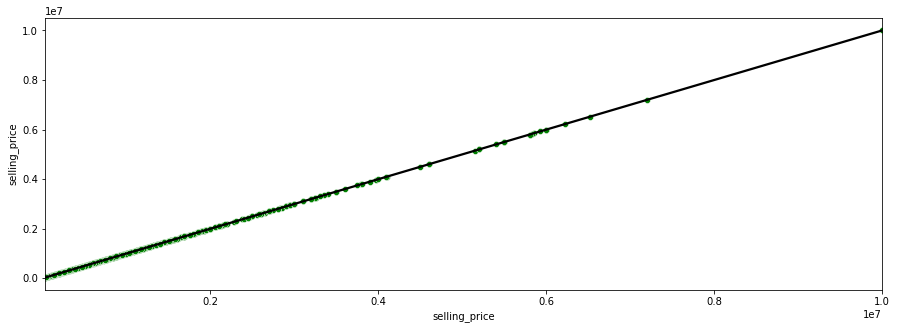

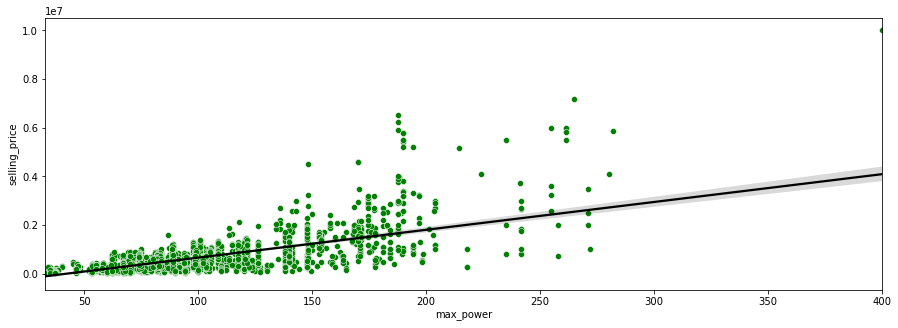

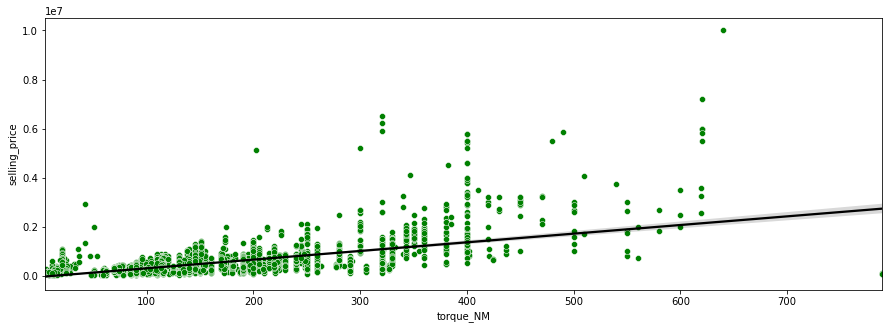

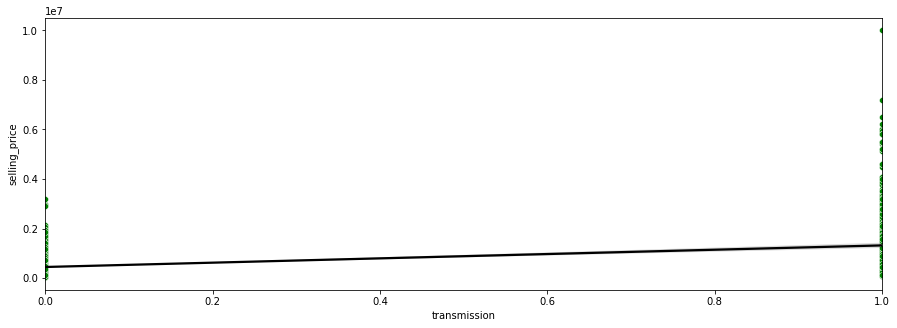

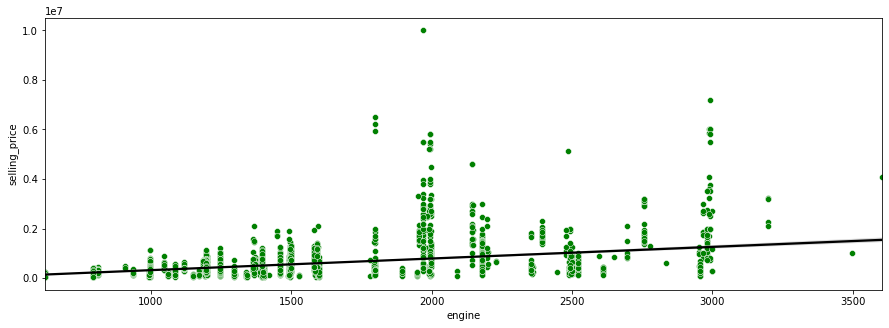

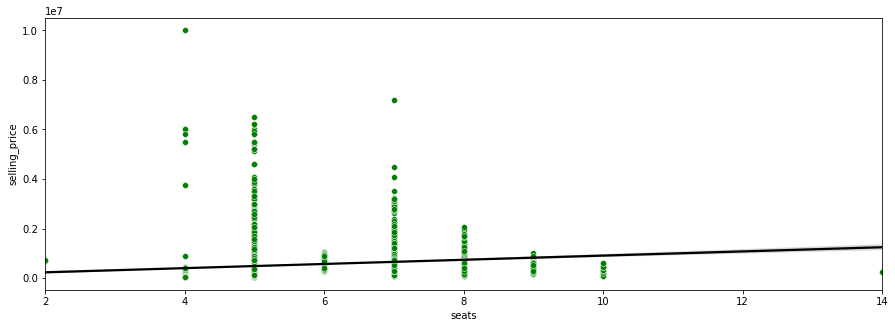

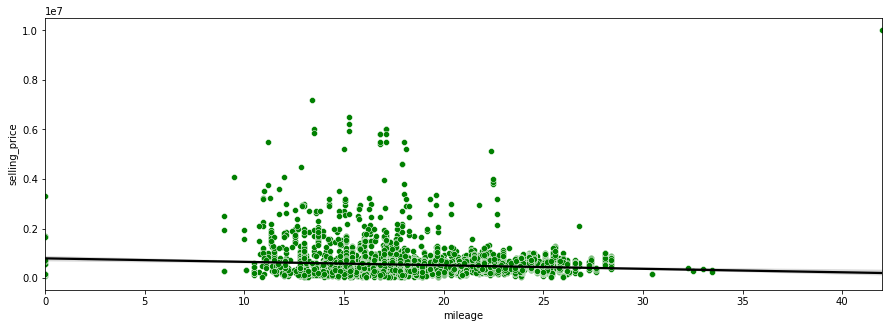

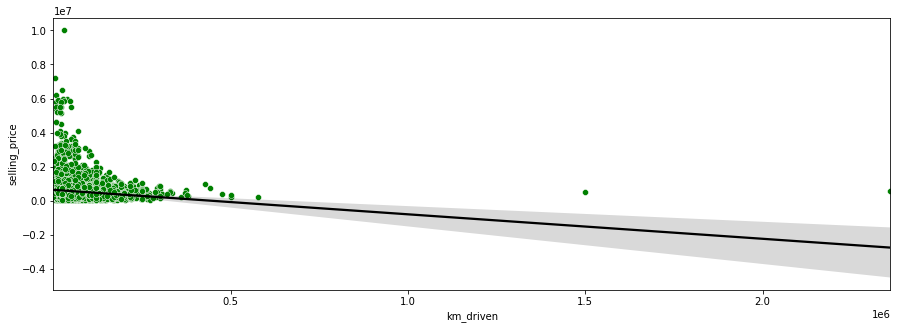

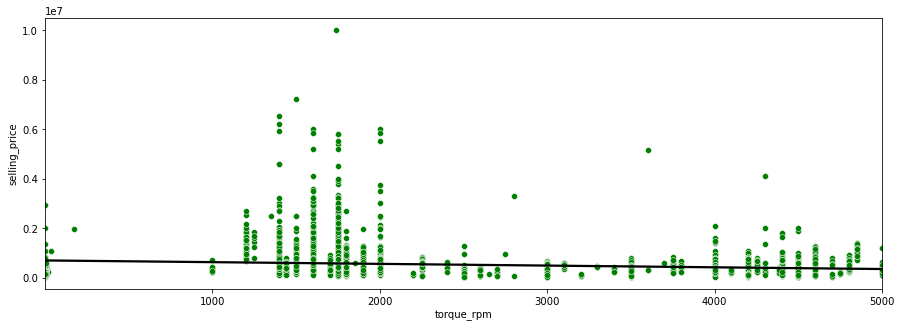

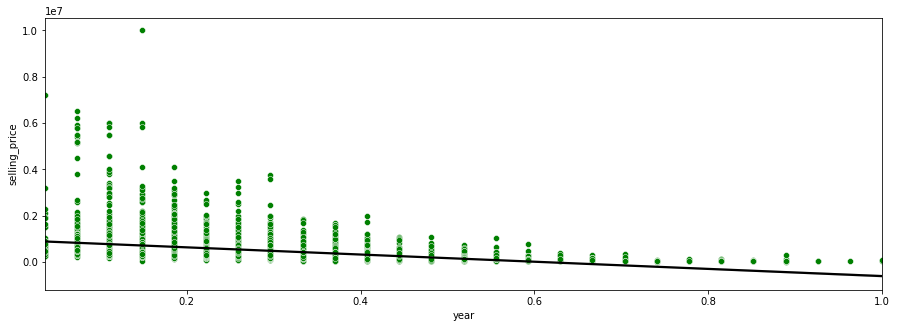

In [74]:
for i in num_columns:
    plt.figure(figsize=(15,5))
    sns.scatterplot(x=i, y="selling_price", data=df,color='green')
    sns.regplot(x=i, y="selling_price", data=df,scatter=False,color='black')
    plt.show()

In [75]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
torque_NM        0
torque_rpm       4
dtype: int64

In [76]:
df.dropna(inplace=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6713 entries, 0 to 8125
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6713 non-null   object 
 1   year           6713 non-null   float64
 2   selling_price  6713 non-null   int64  
 3   km_driven      6713 non-null   int64  
 4   fuel           6713 non-null   object 
 5   seller_type    6713 non-null   object 
 6   transmission   6713 non-null   int64  
 7   owner          6713 non-null   object 
 8   mileage        6713 non-null   float32
 9   engine         6713 non-null   int32  
 10  max_power      6713 non-null   float32
 11  seats          6713 non-null   int32  
 12  torque_NM      6713 non-null   float32
 13  torque_rpm     6713 non-null   float32
dtypes: float32(4), float64(1), int32(2), int64(3), object(4)
memory usage: 629.3+ KB


In [83]:
df.to_csv('car_data2.csv',index=False)